## workloads

In [ ]:
#all the instances' types
types = set(['c4.large', 'c4.xlarge', 'c4.2xlarge', 'c3.large', 'c3.xlarge', 'c3.2xlarge', 'm4.large', 'm4.xlarge', 'm4.2xlarge', 'm3.large', 'm3.xlarge', 'm3.2xlarge', 'r4.large', 'r4.xlarge', 'r4.2xlarge', 'r3.large', 'r3.xlarge', 'r3.2xlarge', 'c4.large', 'm4.large', 'r4.large', 'c4.xlarge', 'm4.xlarge', 'r4.xlarge', 'c4.2xlarge', 'm4.2xlarge', 'r4.2xlarge'])


In [ ]:
print(types)
print(len(types))

{'m4.large', 'r4.2xlarge', 'r3.large', 'm3.xlarge', 'm4.2xlarge', 'c4.xlarge', 'r4.large', 'r4.xlarge', 'c3.xlarge', 'r3.2xlarge', 'm3.large', 'c3.2xlarge', 'm3.2xlarge', 'c3.large', 'm4.xlarge', 'r3.xlarge', 'c4.large', 'c4.2xlarge'}
18


## fit the sps score for multi-nodes workloads

In [ ]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

my = np.array([2.94, 2.91, 2.85, 2.74, 2.54, 2.36])
cy = np.array([2.98, 2.96, 2.91, 2.72, 2.55, 2.45])
ry = np.array([2.94, 2.89, 2.77, 2.53, 2.25, 2.1])

x_raw = np.array([2, 4, 8, 16, 32, 50])
x = np.array([2, 4, 8, 16, 32, 50]).reshape((-1, 1))

reg = linear_model.LinearRegression()
line_m = reg.fit(x, my)
mw = line_m.coef_[0]
mb = line_m.intercept_

print(mw, mb)


-0.012165413533834593 2.950421052631579


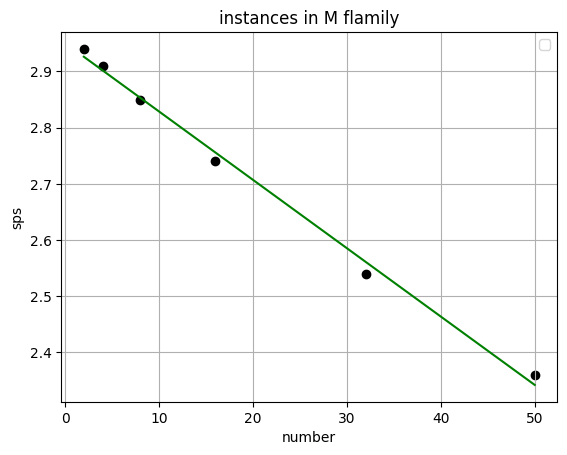

In [ ]:
import matplotlib.pyplot as plt

# draw the line
plt.plot(x_raw, line_m.predict(x), color='g')


plt.xlabel("number")
plt.ylabel("sps")
plt.title("instances in M flamily")
plt.scatter(x_raw, my, color="black")
plt.grid()
plt.legend()
plt.show()
plt.close()


In [ ]:
line_c = reg.fit(x, cy)
cw = line_c.coef_[0]
cb = line_c.intercept_

print(cw, cb)

-0.0116203007518797 2.978578947368421


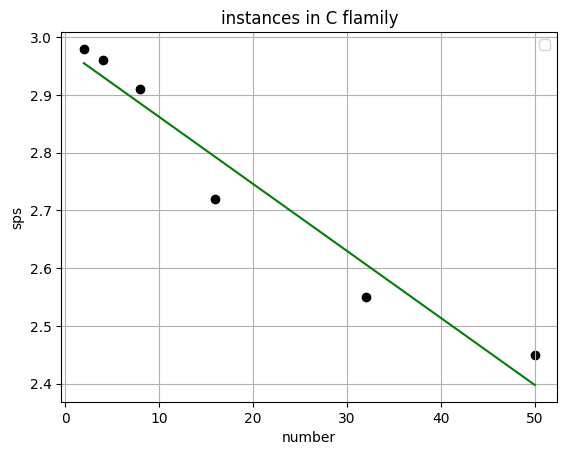

In [ ]:
plt.plot(x_raw, line_c.predict(x), color='g')


plt.xlabel("number")
plt.ylabel("sps")
plt.title("instances in C flamily")
plt.scatter(x_raw, cy, color="black")
plt.grid()
plt.legend()
plt.show()
plt.close()

In [ ]:
line_r = reg.fit(x, ry)
rw = line_c.coef_[0]
rb = line_c.intercept_

print(rw, rb)

-0.01797744360902256 2.9155789473684206


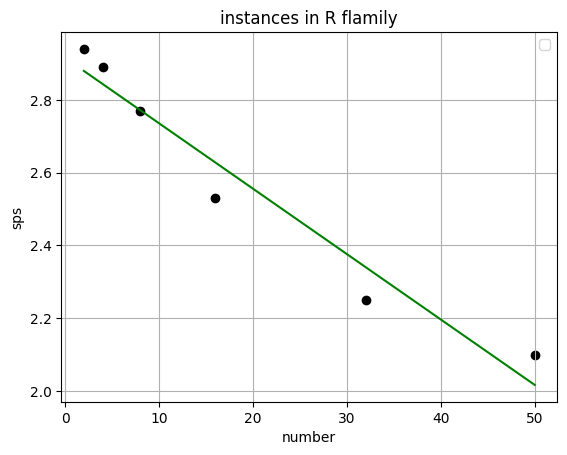

In [ ]:
plt.plot(x_raw, line_r.predict(x), color='g')


plt.xlabel("number")
plt.ylabel("sps")
plt.title("instances in R flamily")
plt.scatter(x_raw, ry, color="black")
plt.grid()
plt.legend()
plt.show()
plt.close()

mw,cw and rw are the decline rates for the 3 classes.

# predict

In [ ]:
pip install pytorch-forecasting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.7/596.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import torch

from pytorch_forecasting import Baseline, DeepAR, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import MAE, SMAPE, MultivariateNormalDistributionLoss

In [ ]:
#load the data for c type
import pandas as pd
df = pd.read_csv('avg_sps_c.csv', header=None)
df.columns = ['sps', 'time']
size = 4318
series = ['0'] * size
df['series'] = series
df['time_id'] = list(range(4318))
print(df)

           sps                 time series  time_id
0     2.888889  2023-06-01 00:00:00      0        0
1     2.888889  2023-06-01 00:10:00      0        1
2     2.888889  2023-06-01 00:20:00      0        2
3     2.888889  2023-06-01 00:30:00      0        3
4     2.888889  2023-06-01 00:40:00      0        4
...        ...                  ...    ...      ...
4313  2.666667  2023-06-30 23:10:00      0     4313
4314  2.666667  2023-06-30 23:20:00      0     4314
4315  2.666667  2023-06-30 23:30:00      0     4315
4316  2.666667  2023-06-30 23:40:00      0     4316
4317  2.666667  2023-06-30 23:50:00      0     4317

[4318 rows x 4 columns]


In [ ]:
data = df
max_prediction_length = 144
max_encoder_length = 1008
context_length = max_encoder_length
prediction_length = max_prediction_length
training_cutoff = data["time_id"].max() - max_prediction_length

In [ ]:
training = TimeSeriesDataSet(
    data[lambda x: x.time_id <= training_cutoff],
    time_idx="time_id",
    target="sps",
    categorical_encoders={"series": NaNLabelEncoder().fit(data.series)},
    group_ids=["series"],
    static_categoricals=[
        "series"
    ],
    time_varying_unknown_reals=["sps"],
    max_encoder_length=context_length,
    max_prediction_length=prediction_length,
)

validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=training_cutoff + 1)
batch_size = 32
train_dataloader = training.to_dataloader(
    train=True, batch_size=batch_size, num_workers=0, batch_sampler="synchronized"
)
val_dataloader = validation.to_dataloader(
    train=False, batch_size=batch_size, num_workers=0, batch_sampler="synchronized"
)

/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/data/samplers.py:86: UserWarning: Less than 32 samples available for 3023 prediction times. Use batch size smaller than 32. First 10 prediction times with small batch sizes: [1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018]
  warnings.warn(


In [ ]:
baseline_predictions = Baseline().predict(val_dataloader, trainer_kwargs=dict(accelerator="cpu"), return_y=True)
SMAPE()(baseline_predictions.output, baseline_predictions.y)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, u

tensor(0.0194)

In [ ]:
pl.seed_everything(42)
import pytorch_forecasting as ptf

trainer = pl.Trainer(accelerator="cpu", gradient_clip_val=1e-1)
net = DeepAR.from_dataset(
    training,
    learning_rate=3e-2,
    hidden_size=30,
    rnn_layers=2,
    #loss=MultivariateNormalDistributionLoss(rank=30),
    optimizer="Adam",
)

INFO: Global seed set to 42
INFO:lightning.fabric.utilities.seed:Global seed set to 42
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'logging_metrics' is an in

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/utilities.py:70: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: LR finder stopped early after 2 steps due to diverging loss.
INFO:lightning.pytorch.tuner.lr_finder:LR finder stopped early after 2 steps due to diverging loss.
ERROR: Failed to compute suggestion for learning rate because there are not enough points. Increase the loop iteration limits or the size of your dataset/dataloader.
ERROR:lightning.pytorch.tuner.lr_finder:Failed to compute suggestion for learning rate because there are not enough points. Increase the loop iteration limits or the size of your dataset/dataloader.
INFO: Restoring states from the checkpoint path at /content/.lr_find_0980a93a-1852-44d4-8b41-37be1d4423a5.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_0980a93a-1852-44d4-8b41-37be1d4423a5.ckpt
INFO: Restored all states from the checkpoint at /content/.lr_find_0980a93a-1852-44d4-8b41-37be1d4423a5.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_f

suggested learning rate: None


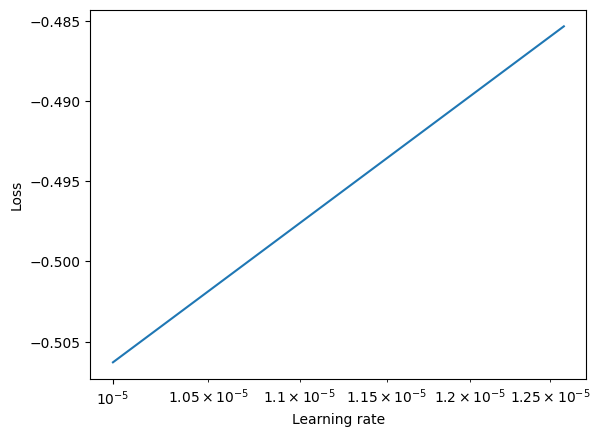

ERROR: Failed to compute suggestion for learning rate because there are not enough points. Increase the loop iteration limits or the size of your dataset/dataloader.
ERROR:lightning.pytorch.tuner.lr_finder:Failed to compute suggestion for learning rate because there are not enough points. Increase the loop iteration limits or the size of your dataset/dataloader.


In [ ]:
# find optimal learning rate
from lightning.pytorch.tuner import Tuner

res = Tuner(trainer).lr_find(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    min_lr=1e-5,
    max_lr=1e0,
    early_stop_threshold=100,
)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()
net.hparams.learning_rate = res.suggestion()


In [34]:
import re
#([01][0-9]|[2][0-3]):[0-5][0-9]:00$/
#pattern = r'\b\d{4}-(?:0[1-9]|1[0-2])-(?:0[1-9]|[1-2]\d|3[0-1])\b'
#pattern = r'\b([01][0-9]|[2][0-3]):[0-5][0-9]:00\b'
pattern = r'\b(?:[01]\d|2[0-3]):(00|30):[0-5]\d\b'
res = re.findall(pattern, '2023-06-01 10:30:30')
print(res)

['30']
